In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

In [70]:
np.random.seed(42)

In [71]:
sold_features = {
    'price_usd': np.random.normal(300000, 50000, 120).clip(100000),
    'size_sqft': np.random.normal(1800, 300, 120).clip(800),
    'age_years': np.random.normal(10, 5, 120).clip(1),
    'bedrooms': np.random.randint(2, 5, 120),
    'distance_to_city_km': np.random.normal(15, 5, 120).clip(1),
    'status': 'Sold'
}
df_sold = pd.DataFrame(sold_features)

In [72]:
unsold_features = {
    'price_usd': np.random.normal(450000, 70000, 80).clip(200000),
    'size_sqft': np.random.normal(2500, 500, 80).clip(1200),
    'age_years': np.random.normal(40, 10, 80).clip(5),
    'bedrooms': np.random.randint(3, 6, 80),
    'distance_to_city_km': np.random.normal(25, 8, 80).clip(2),
    'status': 'Unsold'
}
df_unsold = pd.DataFrame(unsold_features)

In [73]:
df_properties = pd.concat([df_sold, df_unsold]).sample(frac=1).reset_index(drop=True)

In [74]:
df_properties.head()

,price_usd,size_sqft,age_years,bedrooms,distance_to_city_km,status
0,271885.623538,2264.980322,7.578830,2,19.013261,Sold
1,496767.066623,3025.891734,36.330268,3,37.636577,Unsold
2,288292.331264,1976.057128,3.998518,2,1.000000,Sold
3,317180.914478,1726.383565,11.404959,2,8.171676,Sold
4,327128.002179,1648.957304,12.024909,3,27.696289,Sold


In [75]:
df_properties.shape

(200, 6)

In [76]:
features = ['price_usd', 'size_sqft', 'age_years', 'bedrooms', 'distance_to_city_km']
target = df_properties['status']

x = df_properties[features]

In [77]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(x)

In [78]:
principal = PCA(n_components=3)
x_pca = principal.fit_transform(scaled_data)

In [79]:
x_pca.shape

(200, 3)

In [80]:
print("Explained Variance Ratio:", principal.explained_variance_ratio_)
print("Total Variance Explained by 3 Components:", round(sum(principal.explained_variance_ratio_) * 100, 2), "%")

Explained Variance Ratio: [0.61018087 0.11829583 0.11280435]
Total Variance Explained by 3 Components: 84.13 %


In [81]:
target_numerical = df_properties['status'].apply(lambda s: 1 if s == 'Unsold' else 0)

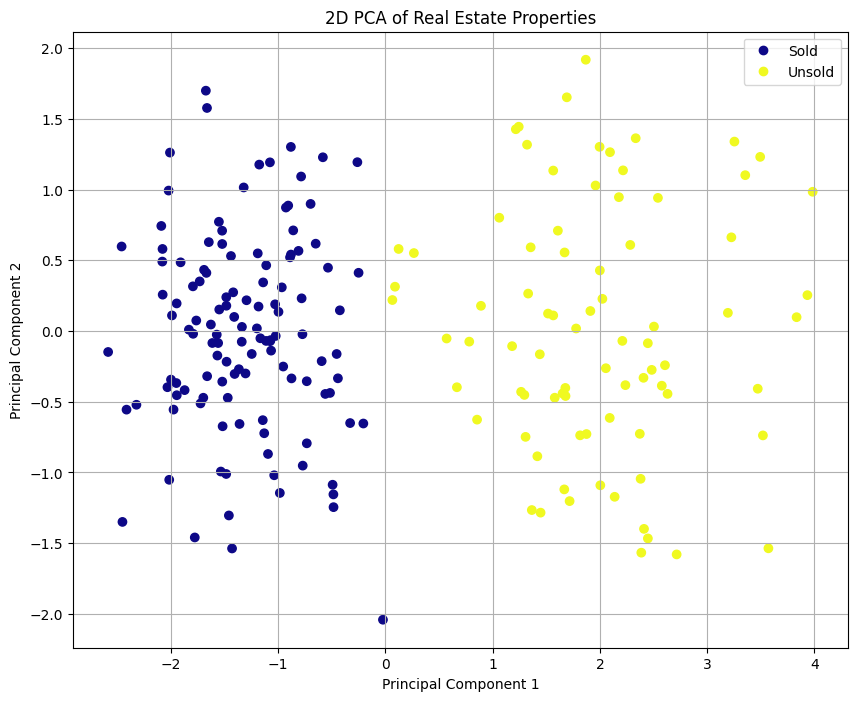

In [82]:
plt.figure(figsize=(10, 8))
plt.title('2D PCA of Real Estate Properties')
plt.xlabel('Principal Component 1') # [cite: 42]
plt.ylabel('Principal Component 2') # [cite: 43]
scatter = plt.scatter(x_pca[:, 0], x_pca[:, 1], c=target_numerical, cmap='plasma')
plt.legend(handles=scatter.legend_elements()[0], labels=['Sold', 'Unsold'])
plt.grid(True)
plt.show()

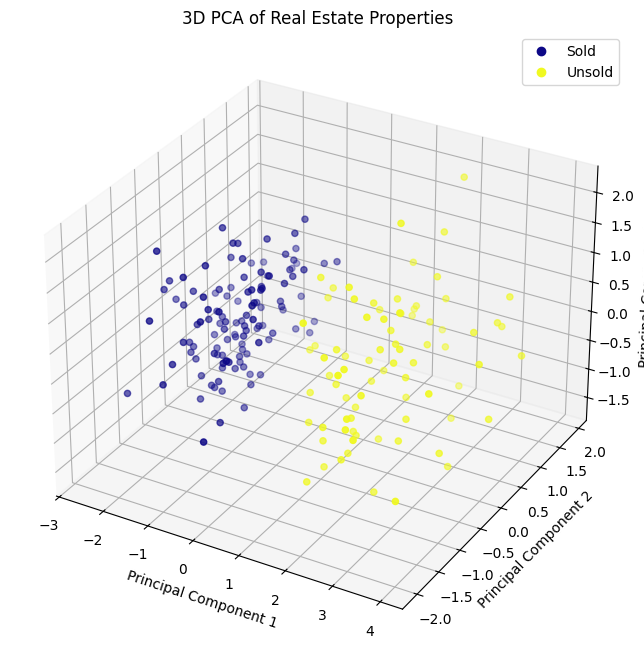

In [83]:
fig = plt.figure(figsize=(10, 8))
axis = fig.add_subplot(111, projection='3d')

scatter_3d = axis.scatter(x_pca[:, 0], x_pca[:, 1], x_pca[:, 2], c=target_numerical, cmap='plasma')

axis.set_xlabel('Principal Component 1')
axis.set_ylabel('Principal Component 2')
axis.set_zlabel('Principal Component 3')
axis.set_title('3D PCA of Real Estate Properties')
axis.legend(handles=scatter.legend_elements()[0], labels=['Sold', 'Unsold'])
plt.show()

# Insights for Maggie
The PCA analysis reveals clear patterns separating 'Sold' from 'Unsold' properties.

1.  **Distinct Profile:** Unsold properties are not random; they form a distinct cluster in the plots. This means they share a combination of features that make them less attractive to buyers compared to the sold properties.

2.  **Key Differentiators:** The principal components are mathematical combinations of the original features. By examining the components, we can infer what drives the separation. The clear clustering suggests that a specific combination of factors like high price, advanced age, and large size might define an 'unsold' property profile in your dataset.

3.  **Actionable Strategy:** To sell the remaining properties, consider strategies that directly address these differentiating factors. For example, if the unsold cluster corresponds to high price and old age, a strategy of modernizing renovations or price adjustments could move these properties into the 'sold' cluster profile.
